In [1]:
import matplotlib
import os
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *

# load stage 3
model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_2/',
              model_directory+'/irv/stage_2/',
              model_directory+'/light_chem/stage_2/',
              model_directory+'/neural_networks/stage_2/',
              model_directory+'/docking/stage_2/',
              model_directory+'/baseline/stage_2/']
gather_df_3 = gather_dir_metrics(class_dirs[0], 1)     
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[1], 1))   
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[2], 1))   
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[3], 1))
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[4], 1))
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[5], 1))

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 183))
col_indices = [i for i in col_indices if 'Mean' not in gather_df_3.columns[i] and 'Median' not in gather_df_3.columns[i]]
col_indices = [i for i in col_indices if 'PriA-SSB AS' in gather_df_3.columns[i]]
metric_names = list(gather_df_3.columns.values[col_indices])

gather_df_3 = gather_df_3[metric_names]
gather_df_3 = gather_df_3.dropna(axis=0)

#setup comparison matrix and overlaps
mm_comp_dicts_3 = get_mean_median_comps(gather_df_3, col_indices=[i for i in range(len(metric_names))])
agg_comp_dict_3 = get_agg_comp(mm_comp_dicts_3, None, mean_w=1, median_w=0, tukey_w=0)
overlapping_models_3 = get_overlap(agg_comp_dict_3, N=1)

C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3578: RuntimeWarning: Invalid value encountered in median for 185 results
  RuntimeWarning)
C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3578: RuntimeWarning: Invalid value encountered in median for 112 results
  RuntimeWarning)
C:\Users\Moeman\Anaconda3\lib\site-packages\pandas\core\generic.py:1765: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self.ix[indexer]
C:\Users\Moeman\Anaconda3\lib\site-packages\pandas\core\indexing.py:796: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_lowerdim(tup)


In [2]:
# load stage 2
model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_1/',
              model_directory+'/irv/stage_1/',
              model_directory+'/light_chem/stage_1/',
              model_directory+'/neural_networks/stage_1/',
              model_directory+'/docking/stage_1/']
k = 5
gather_df_2 = gather_dir_metrics(class_dirs[0], k)     
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[1], k))   
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[2], k))   
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[3], 20))
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[4], k))
gather_df_2 = gather_df_2[metric_names]
gather_df_2 = gather_df_2.dropna(axis=0)

#get tukey results
tukey_dict_2 = tukey_multi_metrics(gather_df_2, col_indices=[i for i in range(len(metric_names))])
tukey_analysis_dict_2 = analyze_tukey_dict(tukey_dict_2)
#setup comparison matrix and overlaps
tukey_dict_2 = tukey_multi_metrics(gather_df_2, col_indices=[i for i in range(len(metric_names))])
tukey_analysis_dict_2 = analyze_tukey_dict(tukey_dict_2)
mm_comp_dicts_2 = get_mean_median_comps(gather_df_2, col_indices=[i for i in range(len(metric_names))])
agg_comp_dict_2 = get_agg_comp(mm_comp_dicts_2, tukey_analysis_dict_2, mean_w=0, median_w=0, tukey_w=1)
overlapping_models_2 = get_overlap(agg_comp_dict_2, N=1)

C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3578: RuntimeWarning: Invalid value encountered in median for 185 results
  RuntimeWarning)
C:\Users\Moeman\Anaconda3\lib\site-packages\pandas\core\generic.py:1765: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self.ix[indexer]
C:\Users\Moeman\Anaconda3\lib\site-packages\pandas\core\indexing.py:796: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_lowerdim(tup)


---
## Compare Model Orderings

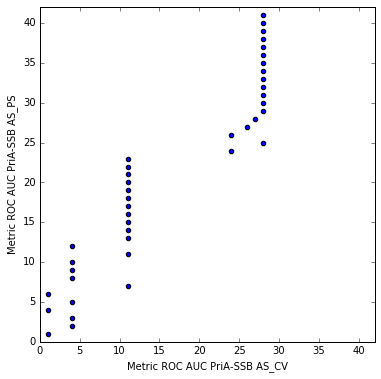

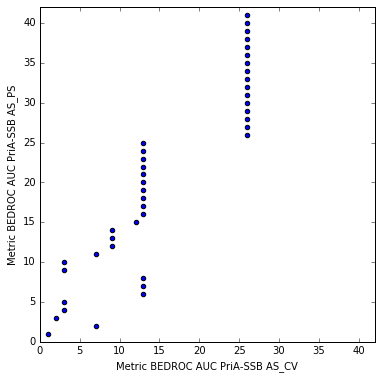

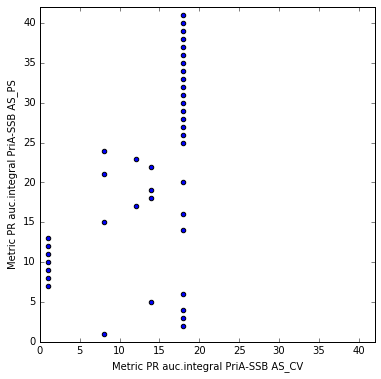

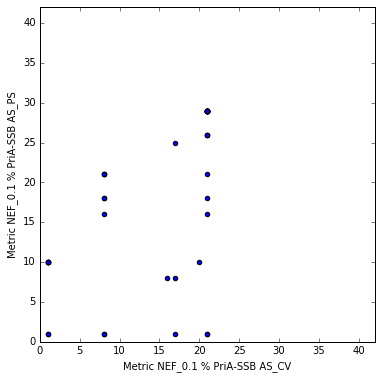

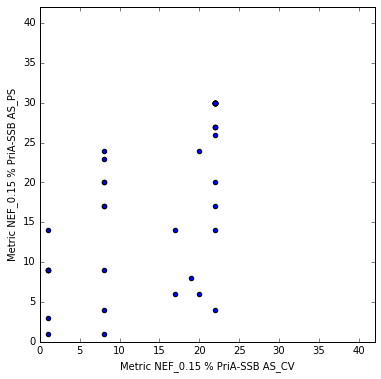

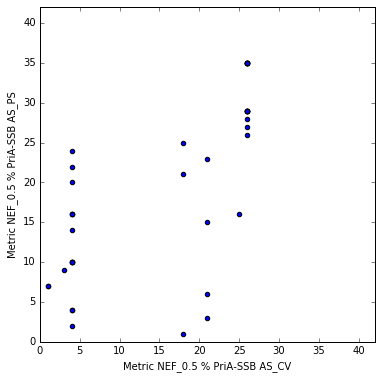

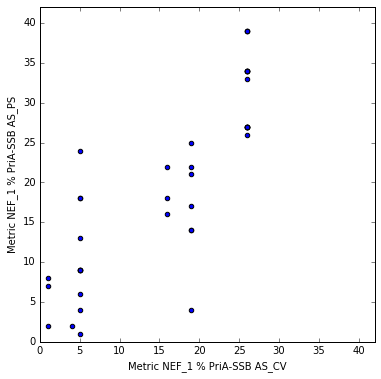

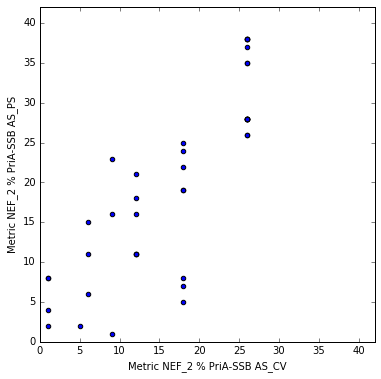

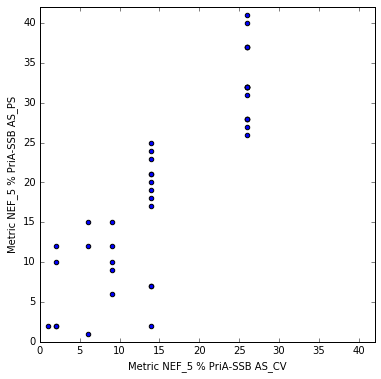

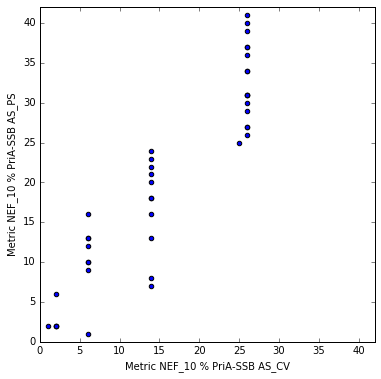

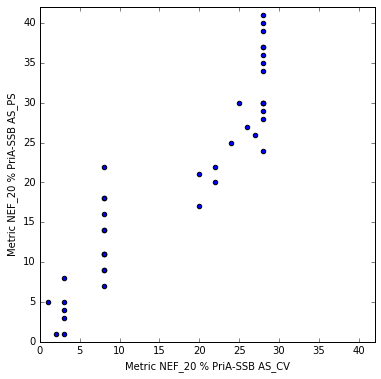

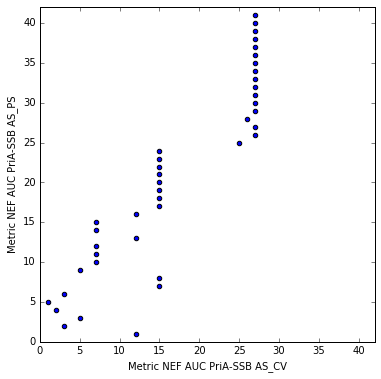

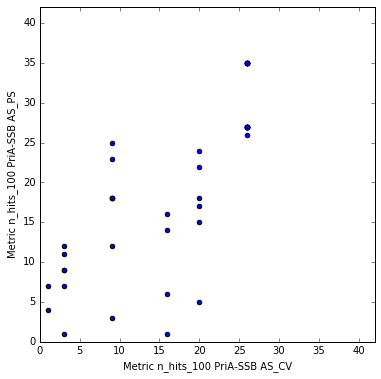

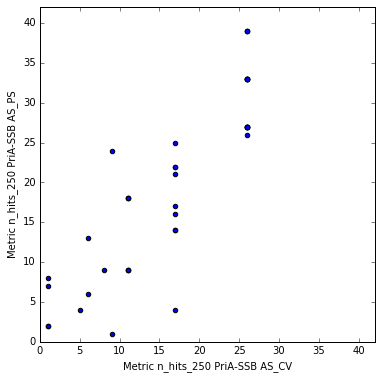

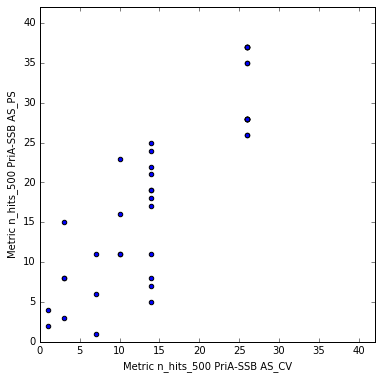

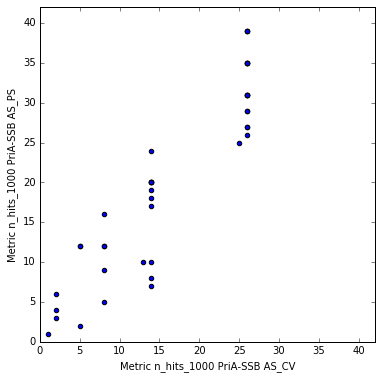

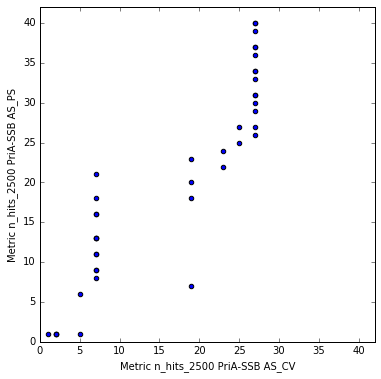

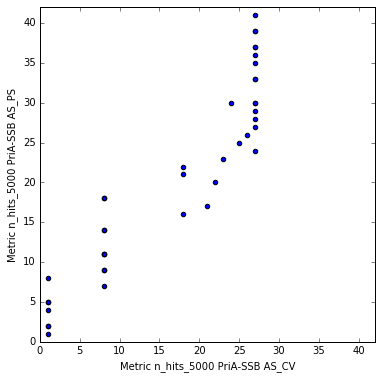

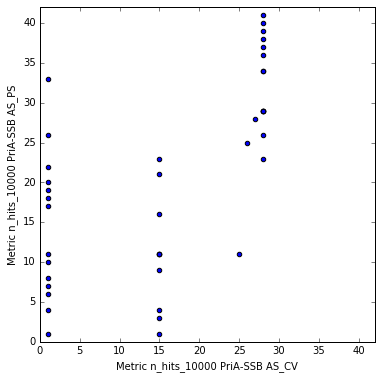

In [3]:
winscore_df_2 = get_model_winscores(agg_comp_dict_2, metric_names)
winscore_df_3 = get_model_winscores(agg_comp_dict_3, metric_names)
winscore_spearman_df = compare_cv_ps_model_ranking(winscore_df_2, winscore_df_3)
if not os.path.exists('./cv_ps_figures/cv_ps_model_ordering_comparison/'):
    os.makedirs('./cv_ps_figures/cv_ps_model_ordering_comparison/')
plot_comparison_cv_ps(winscore_df_2, winscore_df_3, './cv_ps_figures/cv_ps_model_ordering_comparison/')

In [4]:
winscore_spearman_df

,ROC AUC PriA-SSB AS,BEDROC AUC PriA-SSB AS,PR auc.integral PriA-SSB AS,NEF_0.1 % PriA-SSB AS,NEF_0.15 % PriA-SSB AS,NEF_0.5 % PriA-SSB AS,NEF_1 % PriA-SSB AS,NEF_2 % PriA-SSB AS,NEF_5 % PriA-SSB AS,NEF_10 % PriA-SSB AS,NEF_20 % PriA-SSB AS,NEF AUC PriA-SSB AS,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
CV vs. PS,0.942597,0.908693,0.535576,0.658582,0.715596,0.794059,0.876762,0.86243,0.88283,0.92151,0.941499,0.91718,0.837527,0.889629,0.883584,0.914266,0.937529,0.944474,0.690302


---
## Overlapping top 1 and top 5 models over all metrics

In [5]:
overlapping_models_2 

,overlap_perc
CBF_c,0.421053
RandomForest_h,0.210526
SingleRegression_b,0.105263
RandomForest_a,0.105263
CBF_b,0.052632
RandomForest_b,0.052632
CBF_f,0.052632


In [6]:
overlapping_models_3

,overlap_perc
CBF_b,0.315789
CBF_a,0.263158
CBF_c,0.210526
CBF_f,0.105263
CBF_e,0.052632
CBF_d,0.052632


In [7]:
get_overlap(agg_comp_dict_2, N=5)

,overlap_perc
CBF_c,0.789474
CBF_f,0.789474
RandomForest_g,0.578947
RandomForest_h,0.526316
CBF_e,0.368421
CBF_d,0.368421
RandomForest_b,0.315789
CBF_b,0.315789
SingleRegression_b,0.210526
RandomForest_d,0.210526


In [8]:
get_overlap(agg_comp_dict_3, N=5)

,overlap_perc
CBF_c,0.894737
CBF_f,0.894737
CBF_a,0.894737
CBF_e,0.842105
CBF_b,0.684211
CBF_d,0.526316
SingleClassification_b,0.105263
RandomForest_h,0.105263
RandomForest_g,0.052632


---
## Spearman's Ranking Comparison

In [9]:
spearman_df_2, ordered_spearman_df_2 = get_spearman_r(agg_comp_dict_2, metric_names[:-7], metric_names[-7:])
spearman_df_3, ordered_spearman_df_3 = get_spearman_r(agg_comp_dict_3, metric_names[:-7], metric_names[-7:])
diff_df, ordered_diff_df, spearman_df = compare_spearman_r(spearman_df_2, spearman_df_3)
diff_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
ROC AUC,0.069173,0.016238,0.031036,0.001585,0.025254,0.030003,0.193950
BEDROC AUC,0.002494,0.024490,0.009593,0.016619,0.063093,0.097887,0.206359
PR auc.integral,0.138430,0.277393,0.309268,0.325394,0.460114,0.497518,0.421863
NEF_0.1 %,0.046891,0.150971,0.151876,0.176012,0.298147,0.370815,0.226040
NEF_0.15 %,0.059568,0.134045,0.127422,0.139261,0.253090,0.319181,0.193000
NEF_0.5 %,0.046450,0.080501,0.081594,0.084010,0.143875,0.188960,0.095137
NEF_1 %,0.006600,0.015402,0.003308,0.003615,0.082620,0.119419,0.134615
NEF_2 %,0.001071,0.032683,0.016213,0.026320,0.065678,0.111305,0.156161
NEF_5 %,0.026634,0.041783,0.015153,0.022493,0.051189,0.074628,0.163173
NEF_10 %,0.027918,0.006230,0.007614,0.031809,0.037817,0.049600,0.229306


In [10]:
ordered_diff_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,NEF_2 %,NEF_10 %,NEF AUC,ROC AUC,NEF_20 %,NEF_20 %,NEF_0.5 %
1,BEDROC AUC,NEF AUC,NEF_1 %,NEF_1 %,ROC AUC,ROC AUC,NEF_1 %
2,NEF_1 %,NEF_1 %,NEF_10 %,NEF_20 %,NEF AUC,NEF_10 %,NEF_2 %
3,NEF AUC,ROC AUC,BEDROC AUC,BEDROC AUC,NEF_10 %,NEF AUC,NEF_5 %
4,NEF_5 %,BEDROC AUC,NEF_5 %,NEF_5 %,NEF_5 %,NEF_5 %,NEF_0.15 %
5,NEF_10 %,NEF_2 %,NEF_2 %,NEF AUC,BEDROC AUC,BEDROC AUC,ROC AUC
6,NEF_0.5 %,NEF_5 %,ROC AUC,NEF_2 %,NEF_2 %,NEF_2 %,BEDROC AUC
7,NEF_0.1 %,NEF_20 %,NEF_20 %,NEF_10 %,NEF_1 %,NEF_1 %,NEF_20 %
8,NEF_0.15 %,NEF_0.5 %,NEF_0.5 %,NEF_0.5 %,NEF_0.5 %,NEF_0.5 %,NEF AUC
9,ROC AUC,NEF_0.15 %,NEF_0.15 %,NEF_0.15 %,NEF_0.15 %,NEF_0.15 %,NEF_0.1 %


In [11]:
spearman_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
CV vs. PS,0.514887,0.496503,0.86014,0.727273,0.811189,0.825175,0.223776


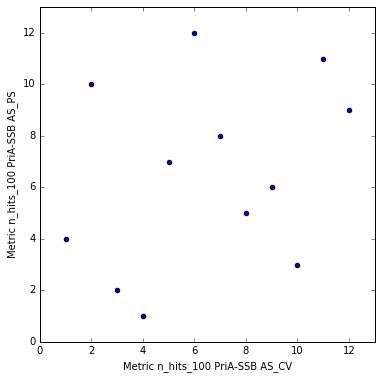

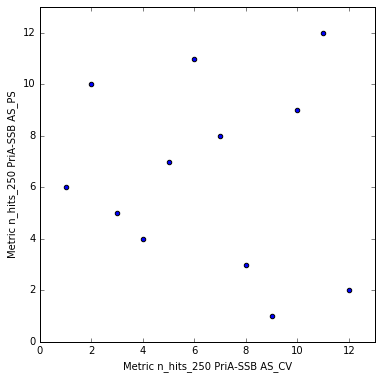

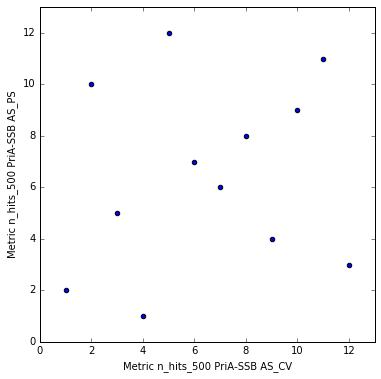

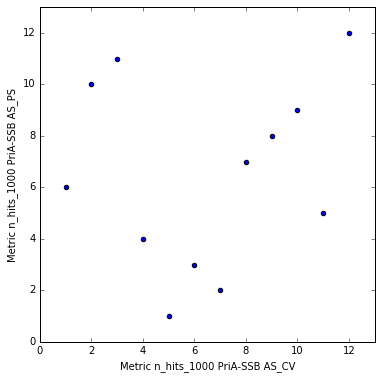

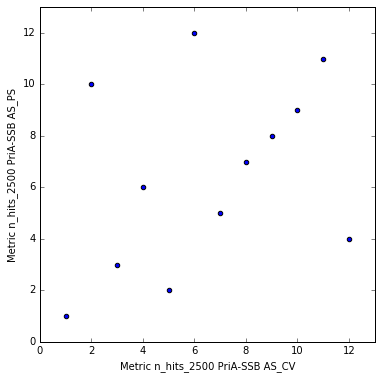

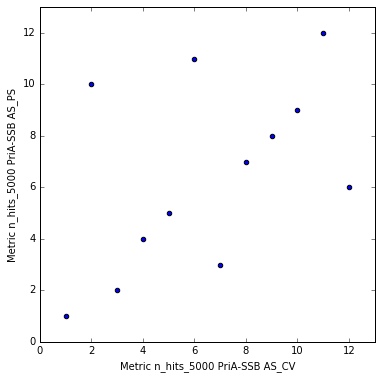

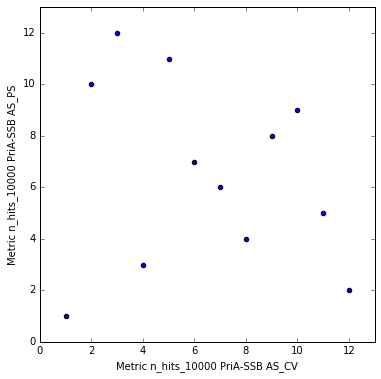

In [12]:
if not os.path.exists('./cv_ps_figures/cs_ps_scatter_plot_comparison/'):
    os.makedirs('./cv_ps_figures/cs_ps_scatter_plot_comparison/')
plot_comparison_cv_ps(ordered_spearman_df_2, ordered_spearman_df_3, './cv_ps_figures/cs_ps_scatter_plot_comparison/')